# Titanic Project

This is a classification problem. The goal is to predict if an arbitrary passenger on Titanic would survive the sinking or not. In this dataset there are 11 features and 1 label "Survived" and the dataset contains both numerical and categorical data.

Dataset Dictionary From the dataset we can assume the following things:

Survived: 0 = No(Dead) and 1 = Yes(Survived) Pclass=Passengr's class: 1 = Upper class, 2 = Middle class, 3 = Lower class SibSp: It indicates the passenger's relation with siblings and Spouse. Parch: It indicates the passenger's relation with parents. Embarked: The ports of embarkations are C = Cherbourg, Q = Queenstown and S = Southampton.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file from dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Checking the dimension of the dataset
df.shape

(891, 12)

In [5]:
# Checking the types of the dataset
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

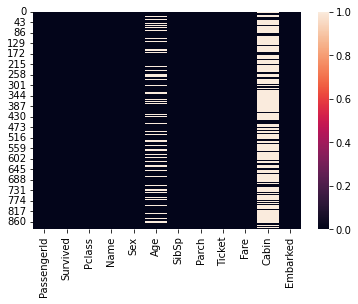

In [9]:
sns.heatmap(df.isnull())

In [10]:
#checking columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [12]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
df.loc[df['Survived']==" "]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Visualization by Univariate Analysis

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

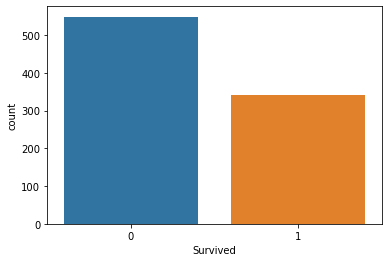

In [15]:
print(df["Survived"].value_counts())
sns.countplot(df["Survived"])

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

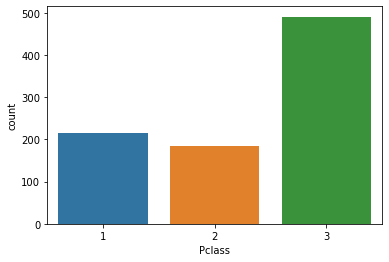

In [16]:
print(df["Pclass"].value_counts())
sns.countplot(df["Pclass"])

male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

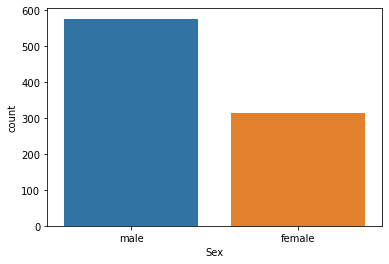

In [17]:
print(df["Sex"].value_counts())
sns.countplot(df["Sex"])

S    644
C    168
Q     77
Name: Embarked, dtype: int64


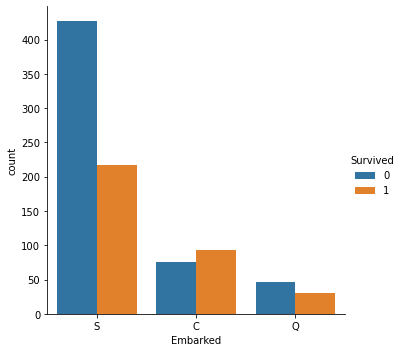

In [18]:
print(df["Embarked"].value_counts())
sns.factorplot('Embarked',kind='count',data=df,hue='Survived')

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


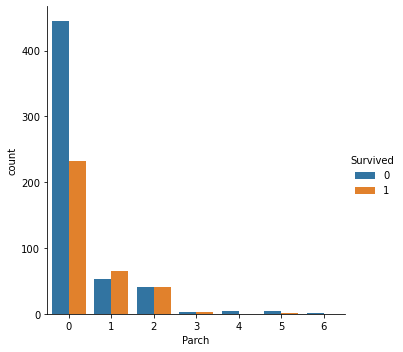

In [19]:
print(df["Parch"].value_counts())
sns.factorplot('Parch',kind='count',data=df,hue='Survived')

# Distribution of skewness

<AxesSubplot:xlabel='Age', ylabel='Density'>

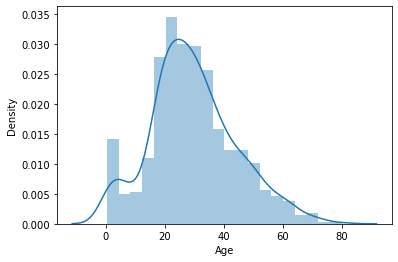

In [20]:
sns.distplot(df["Age"])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

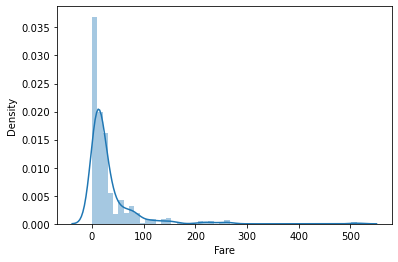

In [21]:
sns.distplot(df["Fare"])

<AxesSubplot:xlabel='PassengerId', ylabel='Density'>

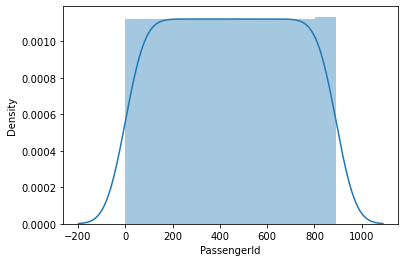

In [22]:
sns.distplot(df["PassengerId"])

<AxesSubplot:xlabel='Survived', ylabel='Density'>

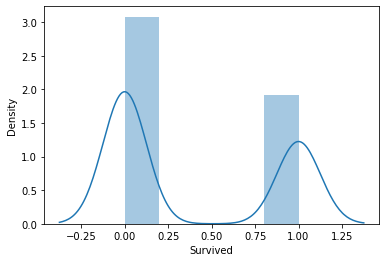

In [23]:
sns.distplot(df["Survived"])

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

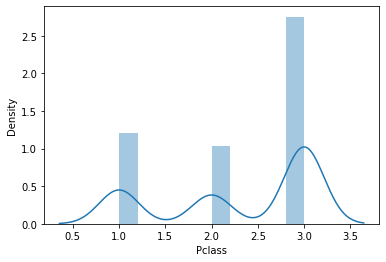

In [24]:
sns.distplot(df["Pclass"])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

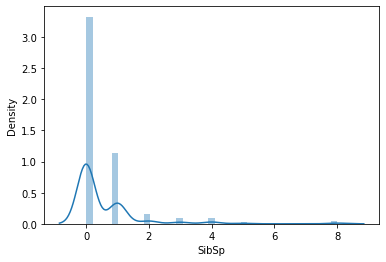

In [25]:
sns.distplot(df["SibSp"])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

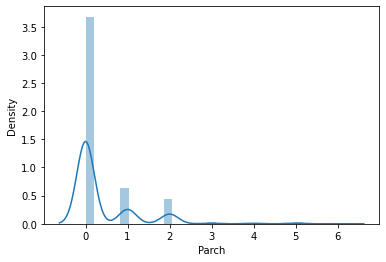

In [26]:
sns.distplot(df["Parch"])

# Bivariate Analysis

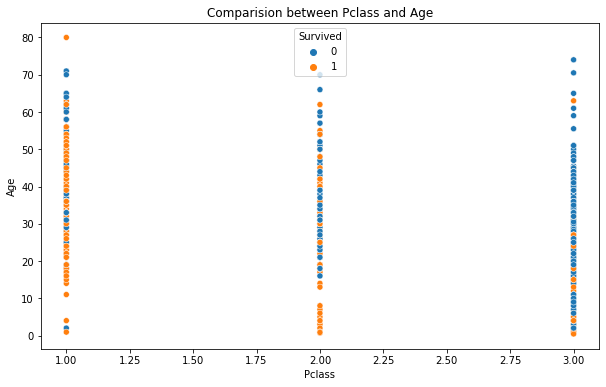

In [27]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Pclass and Age')
sns.scatterplot(df['Pclass'],df['Age'],hue=df["Survived"]);

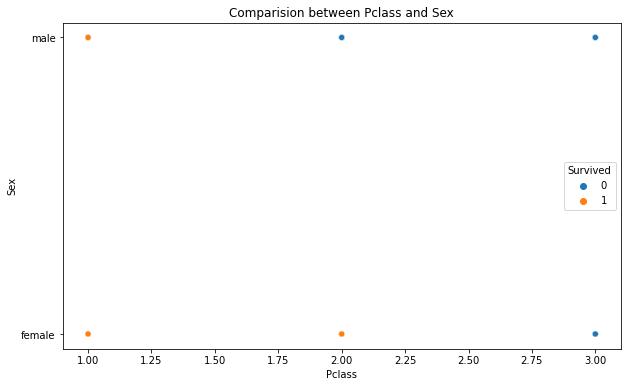

In [28]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Pclass and Sex')
sns.scatterplot(df['Pclass'],df['Sex'],hue=df["Survived"]);

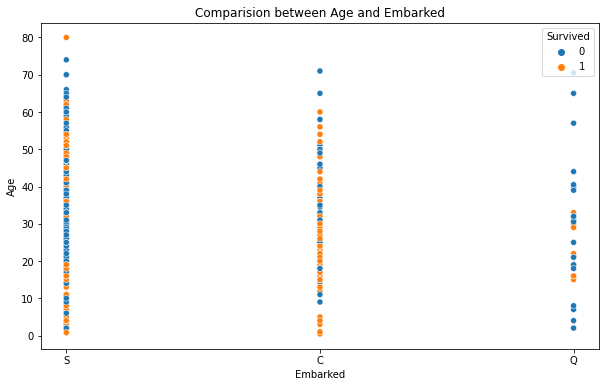

In [29]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Age and Embarked')
sns.scatterplot(df['Embarked'],df['Age'],hue=df["Survived"]);

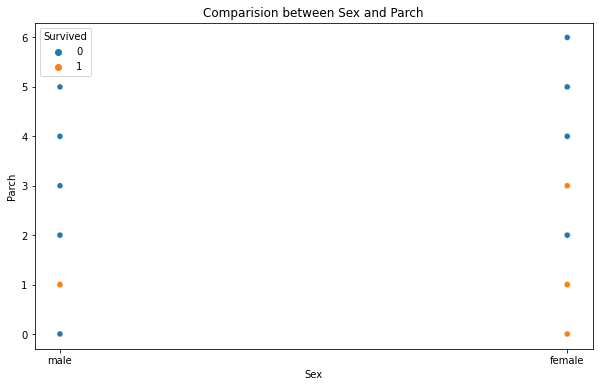

In [30]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Sex and Parch')
sns.scatterplot(df['Sex'],df['Parch'],hue=df["Survived"]);

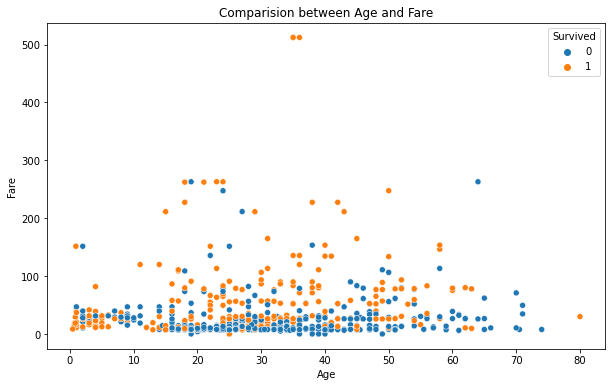

In [31]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Age and Fare')
sns.scatterplot(df['Age'],df['Fare'],hue=df["Survived"]);

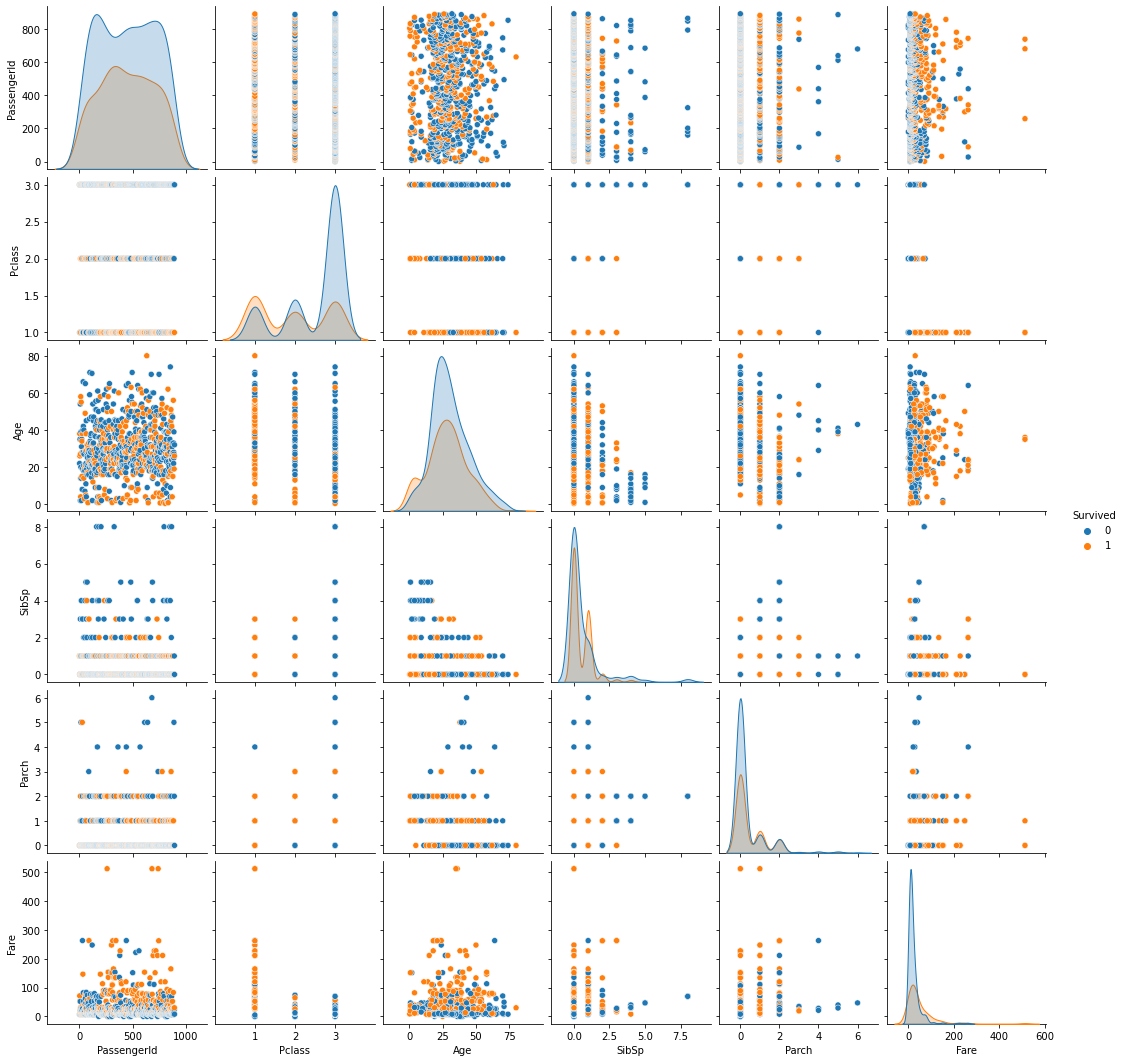

In [32]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Survived")

# Correlation between the target variable and independent variables using HEAT map

In [33]:
cor = df.corr()
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

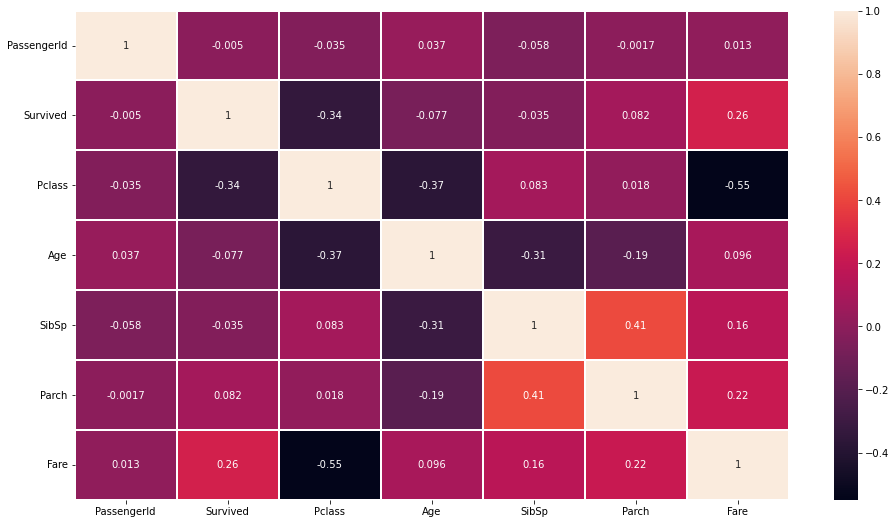

In [34]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);
cor['Survived'].sort_values(ascending=False)

# Visualizing the correlation between label and features using bar plot


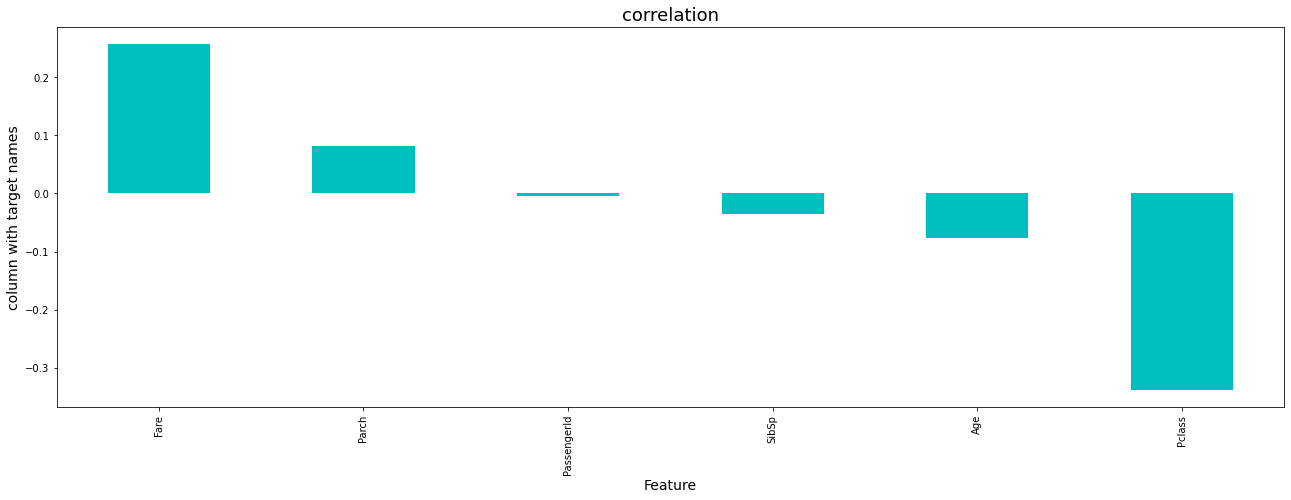

In [35]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [36]:
# Dropping PassengerId column
df.drop('PassengerId', axis=1, inplace = True )
df.drop('Name',axis=1, inplace=True)   # Name has no important to build our madel
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


# Identifying the outliers

<AxesSubplot:xlabel='Age'>

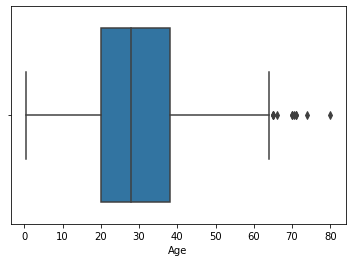

In [37]:
sns.boxplot(df["Age"])

<AxesSubplot:xlabel='Fare'>

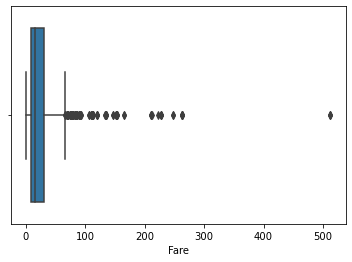

In [38]:
sns.boxplot(df["Fare"])

<AxesSubplot:xlabel='SibSp'>

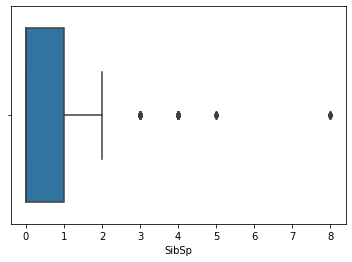

In [39]:
sns.boxplot(df["SibSp"])

<AxesSubplot:xlabel='Parch'>

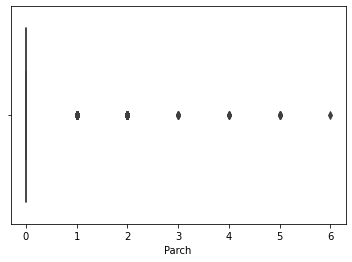

In [40]:
sns.boxplot(df["Parch"])


In [41]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [42]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [43]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [44]:
df['Cabin'] = df['Cabin'].fillna('U')

In [45]:
#Zscore method
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [46]:
#Chcking null values after filling them
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

<AxesSubplot:>

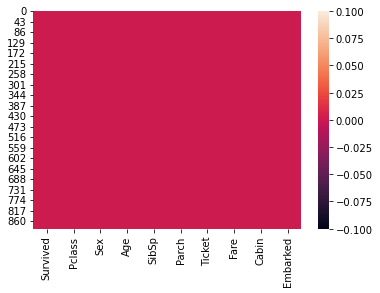

In [47]:
# Visualizing the missing value after treating it using heat map.
sns.heatmap(df.isnull())

In [48]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [49]:
variables = df[['Age','Fare']]

In [50]:
from scipy.stats import zscore
z=np.abs(zscore(variables))
z

,Age,Fare
0,0.565736,0.502445
1,0.663861,0.786845
2,0.258337,0.488854
3,0.433312,0.420730
4,0.433312,0.486337
...,...,...
886,0.181487,0.386671
887,0.796286,0.044381
888,0.104637,0.176263
889,0.258337,0.044381


In [51]:
new_df = df[(z<3).all(axis=1)]
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,U,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,U,S


In [52]:
df.shape

(891, 10)

In [53]:
new_df.shape

(864, 10)

In [54]:
# Let's check the the data loss
data_loss = (891-864)/891*100
data_loss

3.0303030303030303

In [55]:
# IQR (Inter Quantile Range) method
# 1st quantile
Q1=variables.quantile(0.25)

# 3rd quantile
Q3=variables.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [56]:
df.shape

(891, 10)

In [57]:
df1.shape

(721, 10)

In [58]:
data_loss = (891-721)/891*100
data_loss

19.07968574635241

In [59]:
new_df.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.321096
SibSp       3.751753
Parch       2.840412
Fare        2.257178
dtype: float64

# Encoding the data using Label Encoding

In [60]:
cols = ["Sex", "Ticket", "Cabin", "Embarked"]


In [61]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[cols]= new_df[cols].apply(LE.fit_transform)

In [62]:
new_df[cols].head()

,Sex,Ticket,Cabin,Embarked
0,1,517,135,2
1,0,587,70,0
2,0,655,135,2
3,0,48,48,2
4,1,466,135,2


In [63]:
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,517,7.2500,135,2
1,1,1,0,38.0,1,0,587,71.2833,70,0
2,1,3,0,26.0,0,0,655,7.9250,135,2
3,1,1,0,35.0,1,0,48,53.1000,48,2
4,0,3,1,35.0,0,0,466,8.0500,135,2


In [64]:
x = new_df.drop("Survived", axis=1)
y = new_df["Survived"]

In [65]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,1,0,517,7.2500,135,2
1,1,0,38.0,1,0,587,71.2833,70,0
2,3,0,26.0,0,0,655,7.9250,135,2
3,1,0,35.0,1,0,48,53.1000,48,2
4,3,1,35.0,0,0,466,8.0500,135,2


In [66]:
y.value_counts()

0    537
1    327
Name: Survived, dtype: int64

In [67]:
x.shape, y.shape

((864, 9), (864,))

# Modeling
#Finding the best random state

In [68]:
x.shape, y.shape

((864, 9), (864,))

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8346153846153846  on Random_state  109


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [71]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape


((604, 9), (604,), (260, 9), (260,))

In [72]:
#classification of algorithms
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

In [73]:
#Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.8384615384615385
[[137  26]
 [ 16  81]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       163
           1       0.76      0.84      0.79        97

    accuracy                           0.84       260
   macro avg       0.83      0.84      0.83       260
weighted avg       0.84      0.84      0.84       260



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

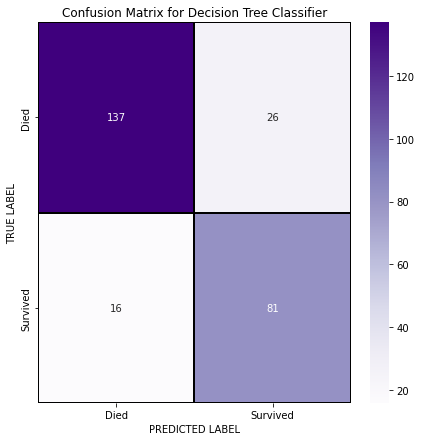

In [74]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

In [75]:
#Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))


0.85
[[142  21]
 [ 18  79]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       163
           1       0.79      0.81      0.80        97

    accuracy                           0.85       260
   macro avg       0.84      0.84      0.84       260
weighted avg       0.85      0.85      0.85       260



Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

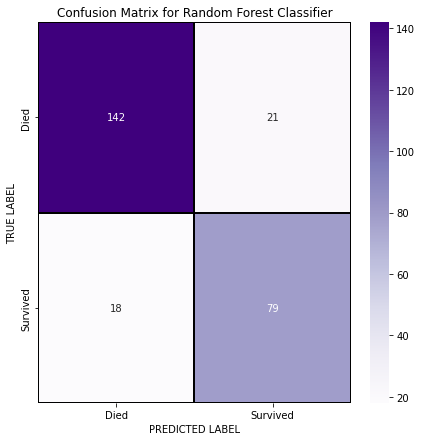

In [76]:
# Lets plot confusion matrix for Random Forest Classifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')

In [77]:
#Logistic Regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))


0.7923076923076923
[[139  24]
 [ 30  67]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       163
           1       0.74      0.69      0.71        97

    accuracy                           0.79       260
   macro avg       0.78      0.77      0.78       260
weighted avg       0.79      0.79      0.79       260



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

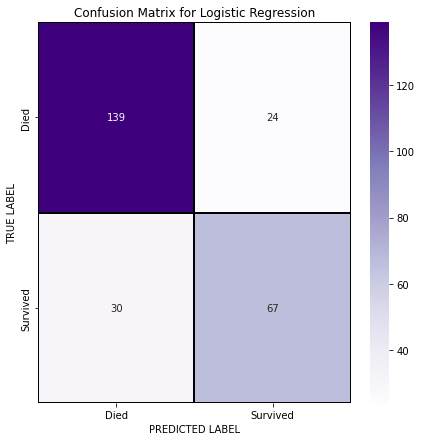

In [78]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')

# Checking the Cross Validation Score


In [79]:
from sklearn.model_selection import cross_val_score


In [80]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7732222072859256


In [81]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8345543755881166


In [82]:
# cv score for Logistic Regression 
print(cross_val_score(LR,x,y,cv=5).mean())

0.7882175023524668


# Hyper parameter tuning for best model

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
# Random Forest Classifier
parameters = {'n_estimators':[0,200],
             'criterion':['gini','entropy'],
             'max_depth':np.arange(2,50),
             'max_features':["auto","sqrt","log2"],
             'max_leaf_nodes':[10,20,30,40]}

In [95]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [96]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 30, 40],
                         'n_estimators': [0, 200]})

In [97]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'n_estimators': 200}

In [98]:
Titanic_survived = RandomForestClassifier(criterion='gini',max_depth=27, max_features='sqrt', max_leaf_nodes=40, n_estimators=200)
Titanic_survived.fit(x_train, y_train)
pred = Titanic_survived.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

100.0


In [99]:
x.shape

(100, 20)

# Plotting ROC-AUC curve for best model

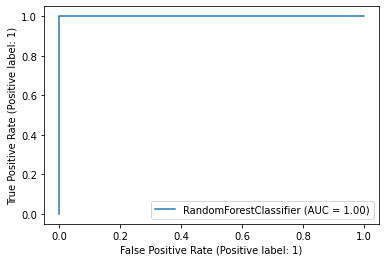

In [100]:
# Support Vector Machine Classifier
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
x,y = datasets.make_classification (random_state=192)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,random_state=87)
df = RandomForestClassifier(random_state=192)
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)
plt.show()

In [91]:
# Saving the model using .pkl
import joblib
joblib.dump(Titanic_survived,"Titanic.pkl")

['Titanic.pkl']